In [0]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = os.path.abspath('/content/drive/My Drive/_data')
data_dir = os.path.join(base_dir, 'Stocks-Data')
SRC_DATA_FILENAME = 'goog_data.pkl'
fp = os.path.join(data_dir, SRC_DATA_FILENAME)

In [0]:
start_data = '2014-01-01'
end_date = '2018-01-01'

In [0]:
# Load or download the data
try:
    goog_data = pd.read_pickle(fp)
except FileNotFoundError:
    goog_data = DataReader('GOOG', 'yahoo', start_data, end_date)
    goog_data.to_pickle(fp)

In [0]:
goog_data = goog_data.tail(620)
close = goog_data['Close']

In [0]:
time_period = 40
alpha = 2 / (time_period + 1)  # smoothing constant
ema_old = 0
ema_values = []

In [0]:
# Calculate exponential moving average values
for close_price in close:
    if ema_old == 0:
        ema_old = close_price  # First day
    else:
        ema_old = (close_price - ema_old) * alpha + ema_old  # EMA formula

    ema_values.append(ema_old)

In [22]:
# Add sma_values to dataframe
goog_data = goog_data.assign(Exponential40DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
goog_data.tail()

,High,Low,Open,Close,Volume,Adj Close,Exponential40DayMovingAverage
Date,,,,,,,
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995,1029.840863
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990,1031.153016
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995,1032.041649
2017-12-28,1054.750000,1044.770020,1051.599976,1048.140015,837100.0,1048.140015,1032.826935
2017-12-29,1049.699951,1044.900024,1046.719971,1046.400024,887500.0,1046.400024,1033.489037


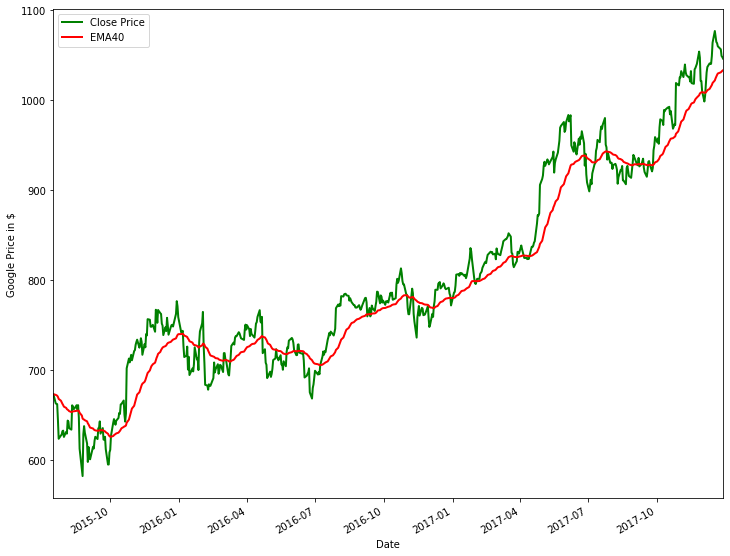

In [23]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(111, ylabel='Google Price in $')
goog_data['Close'].plot(ax=ax1, color='g', lw=2, label='Close Price')
goog_data['Exponential40DayMovingAverage'].plot(ax=ax1, color='r', lw=2, label='EMA40')
plt.legend()
plt.show()